# Pandas Review

In [4]:
!pip install pandas
import pandas as pd

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Previewing the file

In [5]:
df = pd.read_csv('cdc_death_stats.csv')
df.head()

,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1,< 1 year,1,Female,F,American Indian or Alaska Native,1002-5,14,3579.0,Unreliable
1,NaN,Alabama,1,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,24,7443.0,322.5
2,NaN,Alabama,1,< 1 year,1,Female,F,Black or African American,2054-5,2093,169339.0,1236.0
3,NaN,Alabama,1,< 1 year,1,Female,F,White,2106-3,2144,347921.0,616.2
4,NaN,Alabama,1,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,33,7366.0,448.0


In [6]:
type(df)

pandas.core.frame.DataFrame

## Series
#Just pandas way of calling columns

In [7]:
#Preview a column (Pandas Series)
df.State.head() #the .head() method works for Series as well!

0    Alabama
1    Alabama
2    Alabama
3    Alabama
4    Alabama
Name: State, dtype: object

In [8]:
#You can only use the above syntax if your column name has no spaces or special characters
#The syntax below always works.
df['State'].tail() #The general form for calling a column

4110    Wyoming
4111    Wyoming
4112    Wyoming
4113    Wyoming
4114    Wyoming
Name: State, dtype: object

## Subsetting the DataFrame

## Retrieve Column Names of DataFrame

In [9]:
df.columns

Index(['Notes', 'State', 'State Code', 'Ten-Year Age Groups',
       'Ten-Year Age Groups Code', 'Gender', 'Gender Code', 'Race',
       'Race Code', 'Deaths', 'Population', 'Crude Rate'],
      dtype='object')

## Subsetting the DataFrame by Columns

In [10]:
df[df.columns[1:4]].head()

,State,State Code,Ten-Year Age Groups
0,Alabama,1,< 1 year
1,Alabama,1,< 1 year
2,Alabama,1,< 1 year
3,Alabama,1,< 1 year
4,Alabama,1,< 1 year


In [11]:
cols = ['Notes', 'State', 'Population']
df[cols].head()

,Notes,State,Population
0,NaN,Alabama,3579.0
1,NaN,Alabama,7443.0
2,NaN,Alabama,169339.0
3,NaN,Alabama,347921.0
4,NaN,Alabama,7366.0


In [12]:
df[['Gender', 'Deaths']].head()

,Gender,Deaths
0,Female,14
1,Female,24
2,Female,2093
3,Female,2144
4,Male,33


## Subsetting Rows using Conditionals

In [13]:
#Only display data where the State Column is New York and the Deaths column is greater then 50.
ny_50plus = df[(df['State']=='New York')
  & (df['Deaths']>50)]

In [14]:
print(len(df))
print(len(ny_50plus))
ny_50plus.head()

4115
82


,Notes,State,State Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Race,Race Code,Deaths,Population,Crude Rate
2606,NaN,New York,36,< 1 year,1,Female,F,Asian or Pacific Islander,A-PI,485,168826.0,287.3
2607,NaN,New York,36,< 1 year,1,Female,F,Black or African American,2054-5,3767,467735.0,805.4
2608,NaN,New York,36,< 1 year,1,Female,F,White,2106-3,6505,1456339.0,446.7
2610,NaN,New York,36,< 1 year,1,Male,M,Asian or Pacific Islander,A-PI,626,179832.0,348.1
2611,NaN,New York,36,< 1 year,1,Male,M,Black or African American,2054-5,4654,485909.0,957.8


## Groupby

In [15]:
#Grouping by a single feature
grouped = df.groupby('State')['Deaths'].sum()
grouped.head()

State
Alabama        860780
Alaska          63334
Arizona        838094
Arkansas       522914
California    4307061
Name: Deaths, dtype: int64

In [16]:
#Grouping by multiple features and reseting the index
grouped = df.groupby(['Gender', 'Race'])['Deaths'].sum().reset_index()
grouped.head()

,Gender,Race,Deaths
0,Female,American Indian or Alaska Native,120827
1,Female,Asian or Pacific Islander,417760
2,Female,Black or African American,2601979
3,Female,White,19427767
4,Male,American Indian or Alaska Native,145492


# Matplotlib Review
Thus far we've primarily worked with the pyplot module within matplotlib.  
Also recall the ipython magic command for displaying graphs within notebooks:

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

## A simple plot

In [18]:
# df.Population = df.Population.astype(int)
to_plot = df.groupby('State').Deaths.sum().sort_values(ascending=False)
to_plot.head(2)

State
California    4307061
Florida       3131111
Name: Deaths, dtype: int64

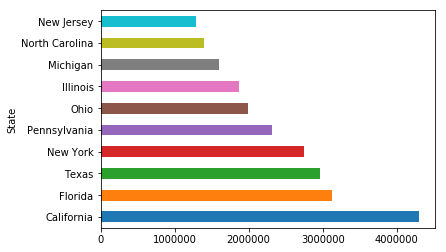

In [19]:
to_plot.head(10).plot(kind='barh')

# Seaborn
Another very useful package that sits on top of matplotlib is called seaborn. Seaborn helps with figure asthetics and making your graphs by default better styled.

In [21]:
!pip install seaborn
import seaborn as sns

    100% |████████████████████████████████| 215kB 12.6MB/s ta 0:00:01
    100% |████████████████████████████████| 31.2MB 1.1MB/s eta 0:00:01  3% |█▎                              | 1.2MB 24.9MB/s eta 0:00:02    11% |███▌                            | 3.4MB 18.8MB/s eta 0:00:02    14% |████▋                           | 4.5MB 20.9MB/s eta 0:00:02
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [28]:
pip install --upgrade pip


The following command must be run outside of the IPython shell:

    $ pip install --upgrade pip

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


## Seaborn styles
One easy thing to do is change the figure asthetic of all future graphs. You can do this by setting a seaborn style with one line:

In [22]:
sns.set_style('darkgrid')

Then simply rerunning our previous code:

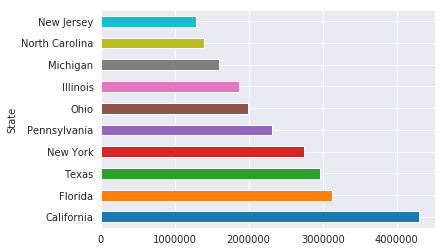

In [23]:
to_plot.head(10).plot(kind='barh')

Voila! Notice that nice background thanks to our seaborn style!

## Seaborn Color Palettes
Another nice feature are color palettes!
Here's a few examples:

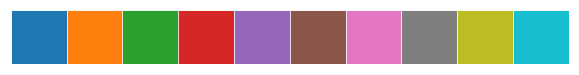

In [24]:
current_palette = sns.color_palette() #Save a color palette to a variable
sns.palplot(current_palette) #Preview color palette

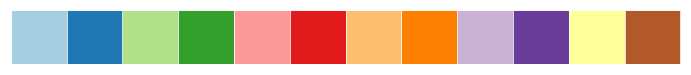

In [25]:
sns.palplot(sns.color_palette("Paired"))

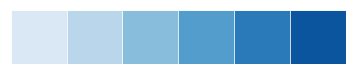

In [26]:
sns.palplot(sns.color_palette("Blues"))

And there are many many more! For a more complete description of available color palettes in seaborn check out the documentation here: https://seaborn.pydata.org/tutorial/color_palettes.html

## Applying a color palette to our previous example:

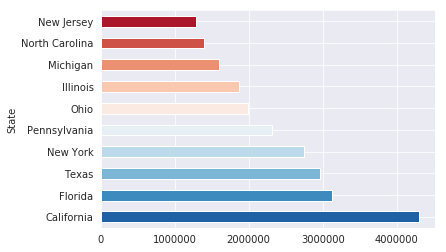

In [27]:
color_palette = sns.color_palette("RdBu_r", 10) #The number reperesents how many colors you want
to_plot.head(10).plot(kind='barh', color = color_palette)